# Name : Kartabya Krishna
# Reg No : 210968244
# Batch : B2
# Date : 20230824

![image.png]()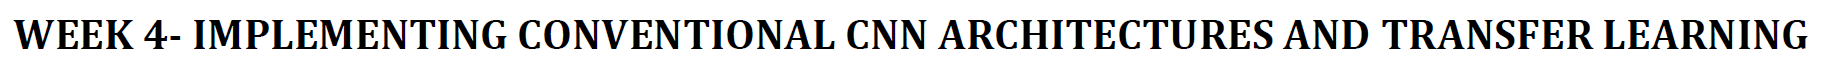

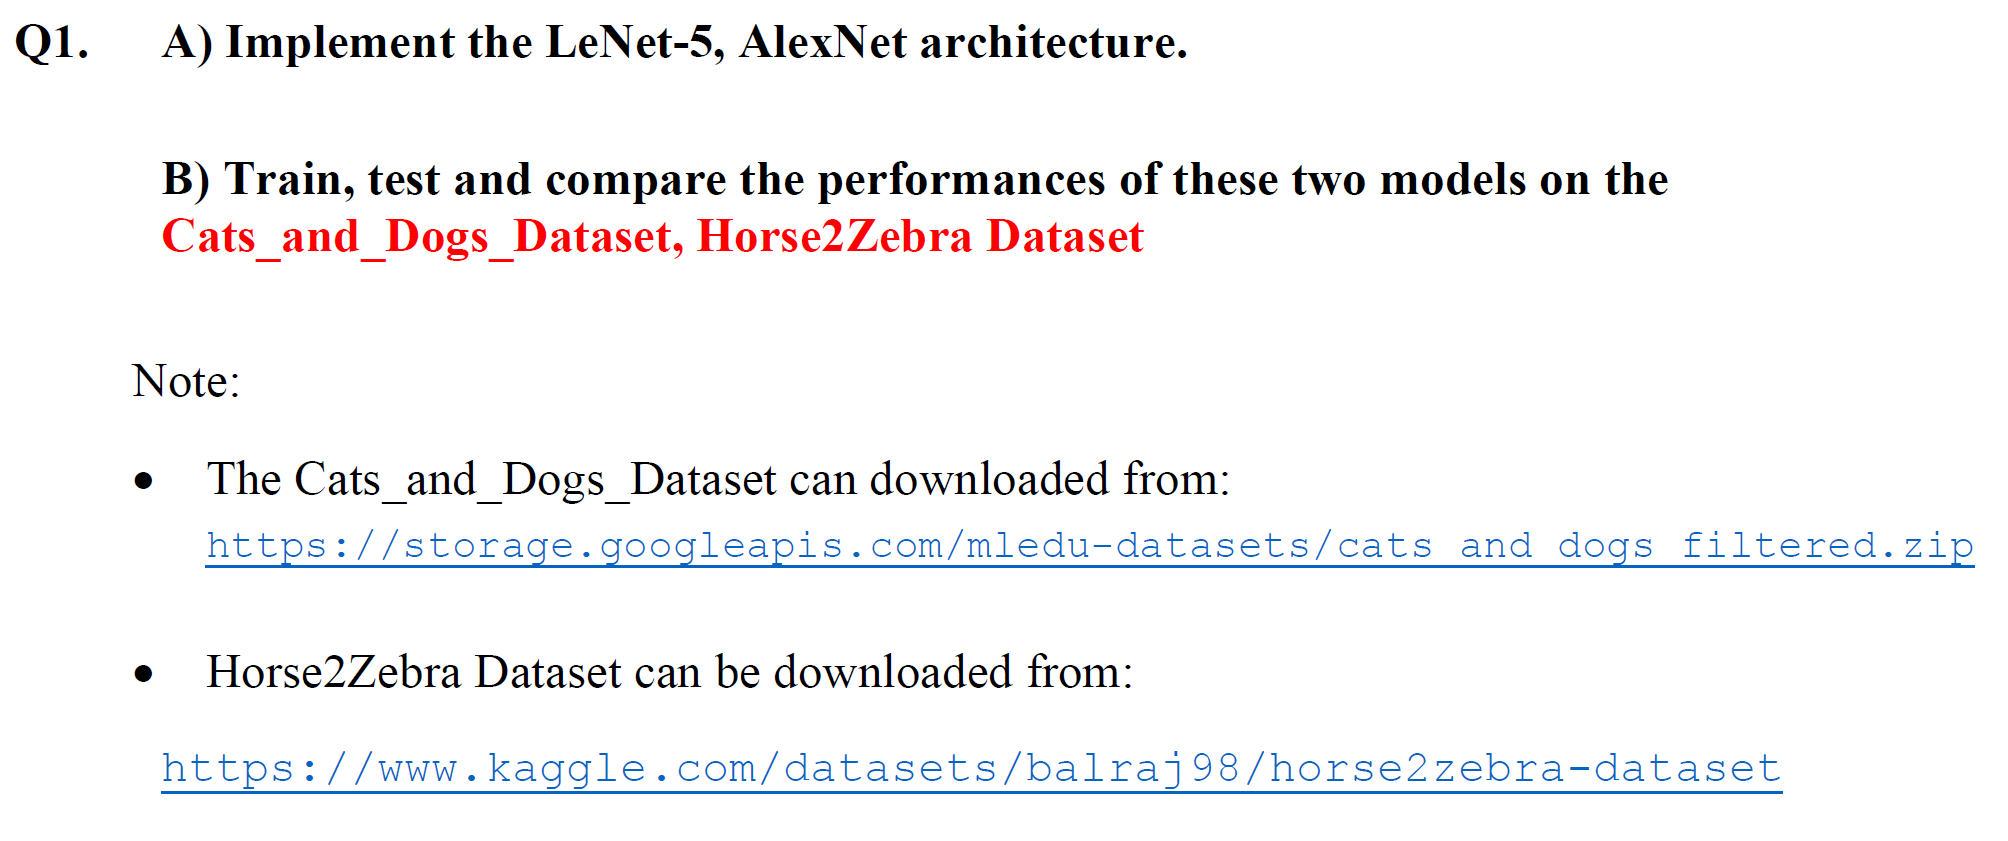

In [ ]:
# Import TensorFlow for deep learning functionality
import tensorflow as tf
# Import Sequential to create a sequential model
from tensorflow.keras.models import Sequential
# Import layers for building the neural network
from tensorflow.keras.layers import Conv2D, Dense, AveragePooling2D, Flatten, MaxPooling2D
# Import ImageDataGenerator for data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Import pandas for data handling
import pandas as pd
# Import numpy for numerical operations
import numpy as np
# Import seaborn for data visualization
import seaborn as sns
# Import matplotlib for additional data visualization
import matplotlib.pyplot as plt
# Import image preprocessing functions
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img
# Import Adam optimizer for training the model
from tensorflow.keras.optimizers import Adam
# Import plot_model for visualizing the model architecture
from tensorflow.keras.utils import plot_model
# Import os for working with file paths and directories
import os

In [ ]:
# Initialize empty lists to store image data for cats and dogs
cats = []
dogs = []

# Loop through files in the 'cats' directory and load images
for fname in os.listdir('data/cats_and_dogs_filtered/train/cats/'):
    # Load an image from the 'cats' directory
    img = load_img(f'data/cats_and_dogs_filtered/train/cats/{fname}')
    # Convert the loaded image to a NumPy array and add it to the 'cats' list
    cats.append(img_to_array(img))

# Loop through files in the 'dogs' directory and load images
for fname in os.listdir('data/cats_and_dogs_filtered/train/dogs/'):
    # Load an image from the 'dogs' directory
    img = load_img(f'data/cats_and_dogs_filtered/train/dogs/{fname}')
    # Convert the loaded image to a NumPy array and add it to the 'dogs' list
    dogs.append(img_to_array(img))


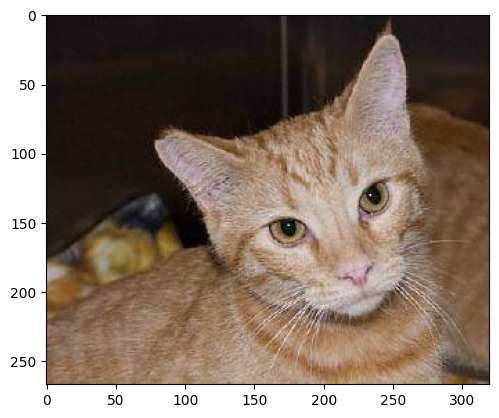

In [ ]:
# Import the necessary library for image display
import matplotlib.pyplot as plt

# Read and display the image using Matplotlib
plt.imshow(plt.imread('data/cats_and_dogs_filtered/train/cats/cat.14.jpg'))

# Show the image on the screen
plt.show()


In [ ]:
# Data generator for training data
train_datagen = ImageDataGenerator(
    rescale=1./255  # Rescale pixel values to the range [0, 1]
)

# Data generator for validation data
val_datagen = ImageDataGenerator(
    rescale=1./255  # Rescale pixel values to the range [0, 1]
)

# Data generator for test data
test_datagen = ImageDataGenerator(
    rescale=1./255  # Rescale pixel values to the range [0, 1]
)


In [ ]:
# Define the base directory where your dataset is located
base_dir = './data/cats_and_dogs_filtered'

# Create directory paths for different data splits (train, validation, test)
train_dir = os.path.join(base_dir, 'train')         # Training data directory
validation_dir = os.path.join(base_dir, 'validation') # Validation data directory
test_dir = os.path.join(base_dir, 'test')             # Test data directory

# Create directory paths for each class within the training, validation, and test sets
train_cats_dir = os.path.join(train_dir, 'cats')       # Directory for training cat images
train_dogs_dir = os.path.join(train_dir, 'dogs')       # Directory for training dog images

validation_cats_dir = os.path.join(validation_dir, 'cats')  # Directory for validation cat images
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # Directory for validation dog images

test_cats_dir = os.path.join(test_dir, 'cats')             # Directory for test cat images
test_dogs_dir = os.path.join(test_dir, 'dogs')             # Directory for test dog images


In [ ]:
# Create a data generator for the training dataset
train_generator = train_datagen.flow_from_directory(
    train_dir,             # Directory containing training images
    target_size=(28, 28),  # Resizes images to the specified dimensions (28x28 pixels in this case)
    batch_size=20,         # Number of images in each batch
    class_mode='categorical'  # Type of classification (categorical for multi-class classification)
)


Found 2000 images belonging to 2 classes.


In [ ]:
# Create a data generator for the validation dataset
val_generator = val_datagen.flow_from_directory(
    validation_dir,         # Directory containing validation images
    target_size=(28, 28),   # Resizes images to the specified dimensions (28x28 pixels in this case)
    batch_size=20,          # Number of images in each batch
    class_mode='categorical'  # Type of classification (categorical for multi-class classification)
)


Found 798 images belonging to 2 classes.


In [ ]:
# Create a data generator for the test dataset
test_generator = test_datagen.flow_from_directory(
    test_dir,               # Directory containing test images
    target_size=(28, 28),   # Resizes images to the specified dimensions (28x28 pixels in this case)
    batch_size=20,          # Number of images in each batch
    class_mode='categorical'  # Type of classification (categorical for multi-class classification)
)


Found 202 images belonging to 2 classes.


In [ ]:
# Create a Sequential model named "LeNet"
lenet_model = Sequential([
    # Define the input layer with a shape of (28, 28, 3) for 28x28 pixel RGB images
    Input(shape=(28, 28, 3)),

    # First Convolutional Layer with 6 filters, a 5x5 kernel, "same" padding, and "tanh" activation
    Conv2D(6, (5, 5), padding="same", activation="tanh"),

    # First Average Pooling Layer with 2x2 pool size and default "valid" padding
    AveragePooling2D(strides=2),

    # Second Convolutional Layer with 16 filters, a 5x5 kernel, "valid" padding, and "tanh" activation
    Conv2D(16, (5, 5), padding="valid", activation="tanh"),

    # Second Average Pooling Layer with 2x2 pool size and default "valid" padding
    AveragePooling2D(strides=2),

    # Flatten layer to convert the 2D feature maps into a 1D vector
    Flatten(),

    # Fully Connected Layer (Dense) with 120 neurons and "sigmoid" activation
    Dense(120, activation="sigmoid"),

    # Fully Connected Layer (Dense) with 84 neurons and "sigmoid" activation
    Dense(84, activation="sigmoid"),

    # Output Layer with 2 neurons (binary classification) and "sigmoid" activation
    Dense(2, activation="sigmoid"),
], name="LeNet")

# Print a summary of the LeNet model architecture
lenet_model.summary()


Model: "LeNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 6)         456       
                                                                 
 average_pooling2d_2 (Averag  (None, 14, 14, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_3 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten_1 (Flatten)         (None, 400)               0         
                                                                 
 dense_3 (Dense)             (None, 120)               48120 

In [ ]:
# Compile the LeNet model
lenet_model.compile(
    loss='binary_crossentropy',             # Binary cross-entropy loss for binary classification
    optimizer=Adam(learning_rate=0.001),    # Adam optimizer with a learning rate of 0.001
    metrics=['acc']                         # Monitor accuracy as a metric during training
)

In [ ]:
# Train the LeNet model
lenet_hist = lenet_model.fit(
    train_generator,     # Training data generator
    epochs=20,           # Number of training epochs (iterations through the entire training dataset)
    validation_data=val_generator  # Validation data generator for evaluating the model during training
)


Epoch 1/20
100/100 [==============================] - 7s 68ms/step - loss: 0.6988 - acc: 0.5085 - val_loss: 0.6916 - val_acc: 0.5238
Epoch 2/20
100/100 [==============================] - 3s 30ms/step - loss: 0.6971 - acc: 0.5210 - val_loss: 0.7103 - val_acc: 0.4950
Epoch 3/20
100/100 [==============================] - 3s 29ms/step - loss: 0.6822 - acc: 0.5700 - val_loss: 0.6780 - val_acc: 0.5752
Epoch 4/20
100/100 [==============================] - 3s 29ms/step - loss: 0.6678 - acc: 0.5910 - val_loss: 0.6713 - val_acc: 0.5727
Epoch 5/20
100/100 [==============================] - 3s 29ms/step - loss: 0.6500 - acc: 0.6185 - val_loss: 0.6957 - val_acc: 0.5664
Epoch 6/20
100/100 [==============================] - 3s 30ms/step - loss: 0.6430 - acc: 0.6240 - val_loss: 0.6938 - val_acc: 0.5802
Epoch 7/20
100/100 [==============================] - 3s 29ms/step - loss: 0.6363 - acc: 0.6400 - val_loss: 0.6675 - val_acc: 0.5977
Epoch 8/20
100/100 [==============================] - 3s 29ms/step - 

In [ ]:
# Evaluate the LeNet model on the test dataset
test_results = lenet_model.evaluate(test_generator, batch_size=32)


11/11 [==============================] - 0s 18ms/step - loss: 0.6057 - acc: 0.6535


In [ ]:
# Create a data generator for the training dataset with a target size of (227, 227)
train_generator = train_datagen.flow_from_directory(
    train_dir,             # Directory containing training images
    target_size=(227, 227),  # Resizes images to 227x227 pixels
    batch_size=20,          # Number of images in each batch
    class_mode='categorical'  # Type of classification (categorical for multi-class classification)
)


Found 2000 images belonging to 2 classes.


In [ ]:
val_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(227, 227),
    batch_size=20,
    class_mode='categorical',
)

Found 598 images belonging to 2 classes.


In [ ]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(227, 227),
    batch_size=20,
    class_mode='categorical',
)

Found 804 images belonging to 2 classes.


In [ ]:
alexnet_model = Sequential([
    Input(shape=(227, 227, 3)),
    Conv2D(96, (11, 11), strides=(4, 4), padding="valid", activation="tanh"),
    MaxPooling2D(pool_size=(3, 3), strides=2),
    Conv2D(256, (5, 5), padding="same", activation="tanh"),
    MaxPooling2D(pool_size=(3, 3), strides=2),
    Conv2D(384, (3, 3), padding="same", activation="tanh"),
    Conv2D(384, (3, 3), padding="same", activation="tanh"),
    Conv2D(256, (3, 3), padding="same", activation="tanh"),
    MaxPooling2D(pool_size=(3, 3), strides=2),
    Flatten(),
    Dense(4096, activation="sigmoid"),
    Dense(4096, activation="sigmoid"),
    Dense(2, activation="sigmoid"),
], name="AlexNet")
alexnet_model.summary()

Model: "AlexNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 27, 27, 96)        0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 27, 27, 256)       614656    
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 13, 13, 256)       0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 13, 13, 384)       885120    
                                                                 
 conv2d_20 (Conv2D)          (None, 13, 13, 384)       1327

In [ ]:
alexnet_model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['acc'])

In [ ]:
alexnet_hist = alexnet_model.fit(train_generator, epochs=20, validation_data=val_generator)

Epoch 1/20
80/80 [==============================] - 31s 326ms/step - loss: 1.0639 - acc: 0.4875 - val_loss: 0.7496 - val_acc: 0.5000
Epoch 2/20
80/80 [==============================] - 25s 311ms/step - loss: 0.7160 - acc: 0.4737 - val_loss: 0.6933 - val_acc: 0.5000
Epoch 3/20
80/80 [==============================] - 25s 318ms/step - loss: 0.7222 - acc: 0.4712 - val_loss: 0.7002 - val_acc: 0.5000
Epoch 4/20
80/80 [==============================] - 27s 335ms/step - loss: 0.7435 - acc: 0.4987 - val_loss: 0.7228 - val_acc: 0.5000
Epoch 5/20
80/80 [==============================] - 25s 313ms/step - loss: 0.7063 - acc: 0.5038 - val_loss: 0.7020 - val_acc: 0.5000
Epoch 6/20
80/80 [==============================] - 25s 318ms/step - loss: 0.7202 - acc: 0.4962 - val_loss: 0.7446 - val_acc: 0.5000
Epoch 7/20
80/80 [==============================] - 26s 321ms/step - loss: 0.7086 - acc: 0.5050 - val_loss: 0.7037 - val_acc: 0.5000
Epoch 8/20
80/80 [==============================] - 26s 322ms/step - 

In [ ]:
alexnet_model.evaluate(test_generator)

41/41 [==============================] - 10s 237ms/step - loss: 0.7114 - acc: 0.5000


[0.7114084959030151, 0.5]